In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *
from soledge.wrapper_class import SOLEDGEcase

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# Read SOLPS

In [2]:
solpscases = {

    # "tightwall_noD2_1e19_novisc" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_2e19_novisc" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_3e19_novisc" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_1e19_novisc_spectra" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc_spectra\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_2e19_novisc_spectra" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc_spectra\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_3e19_novisc_spectra" : r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\2024-11-01 - 1e19 2e19 3e19 no viscosity, spectra\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_spectra_20241106\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_1e19_fixpuff" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playArounD_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc_fixpuff\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_2e19_fixpuff" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playArounD_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc_fixpuff\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    # "tightwall_noD2_3e19_fixpuff" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playArounD_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_novisc_fixpuff\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0",
    "tightwall_noD2_1e19_zerophi" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_zero_phi\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0.b2news_poteq=0",
    "tightwall_noD2_2e19_zerophi" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_zero_phi\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0.b2news_poteq=0",
    "tightwall_noD2_3e19_zerophi" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_zero_phi\xxxxOK.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0.b2news_poteq=0",
    
    "tightwall_noD2_1e19_zerophi_spectra" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_zero_phi_spectra\xxxx.Js=OFF.GAMMAE=4.5.NESEPM=1.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0.b2news_poteq=0",
    "tightwall_noD2_2e19_zerophi_spectra" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_zero_phi_spectra\xxxx.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0.b2news_poteq=0",
    "tightwall_noD2_3e19_zerophi_spectra" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_zero_phi_spectra\xxxx.Js=OFF.GAMMAE=4.5.NESEPM=3.0E+19.NO.D2.eirene_ionz=0.b2tqca_phm0=0.b2news_poteq=0",

}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # _ = read_last10s(solpscases[name], save = True)
    # sp[name].read_last10s(solpscases[name])
    # sp[name].read_from_case(solpscases[name])

# Select case

In [4]:
casepath = solpscases["tightwall_noD2_3e19_zerophi_spectra"]

# Show cell location

In [5]:
triangles_path = os.path.join(casepath, "triangle_mesh.pkl")
with open(triangles_path, "rb") as f:
    triangles = pickle.load(f)

nodes = triangles["nodes"]
cells = triangles["cells"]
triang = mpl.tri.Triangulation(nodes[:,0], nodes[:,1], cells)

labels = {
    5918 : "OMP, far SOL",
    2030 : "OMP, separatrix",
    7322 : "IMP, far SOL",
    2138 : "IMP, separatrix",
    5106 : "Outer target",
    5336 : "Inner target",
}

cell_ids = inv = {v: k for k, v in labels.items()}

(-0.939915508, 0.2)

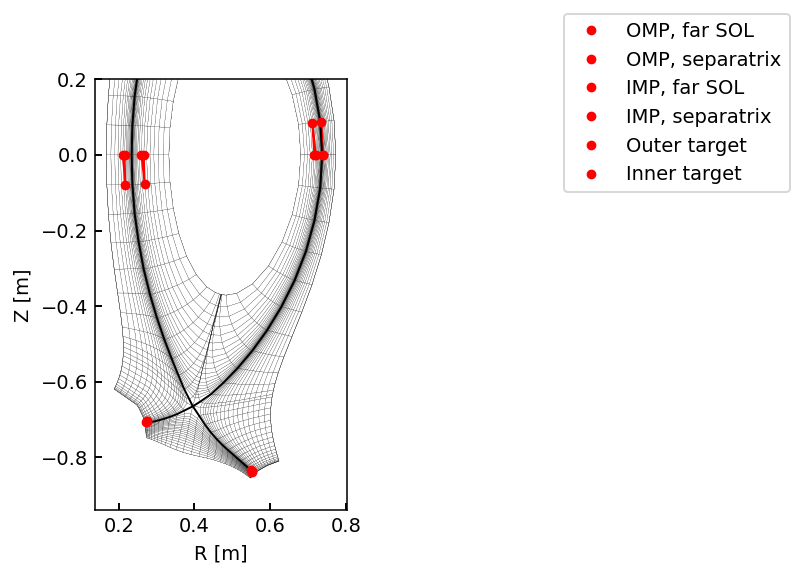

In [6]:
cell_id = 5918
node_ids = triang.triangles[cell_id]
node_R = nodes[node_ids, 0]
node_Z = nodes[node_ids, 1]
poly_nodes = np.column_stack((node_R, node_Z))

fig, ax = plt.subplots()

spc = SOLPScase(casepath)
spc.plot_2d("Ta", ax = ax, antialias = True, linewidth = 0.1, grid_only = True, separatrix_kwargs=dict(c="black", lw = 1))

for name, cell_id in cell_ids.items():
    node_ids = triang.triangles[cell_id]
    node_R = nodes[node_ids, 0]
    node_Z = nodes[node_ids, 1]
    poly_nodes = np.column_stack((node_R, node_Z))
    ax.add_patch(mpl.patches.Polygon(poly_nodes, closed=True, fill="red", edgecolor='red', lw=1))
    ax.plot(node_R, node_Z, marker = "o", ms=4, lw = 0, label=labels[cell_id], c= "red", zorder = 100)
    
fig.legend(bbox_to_anchor = (1,1), loc = "upper left")
ax.set_ylim(None, 0.2)

# Read spectrum

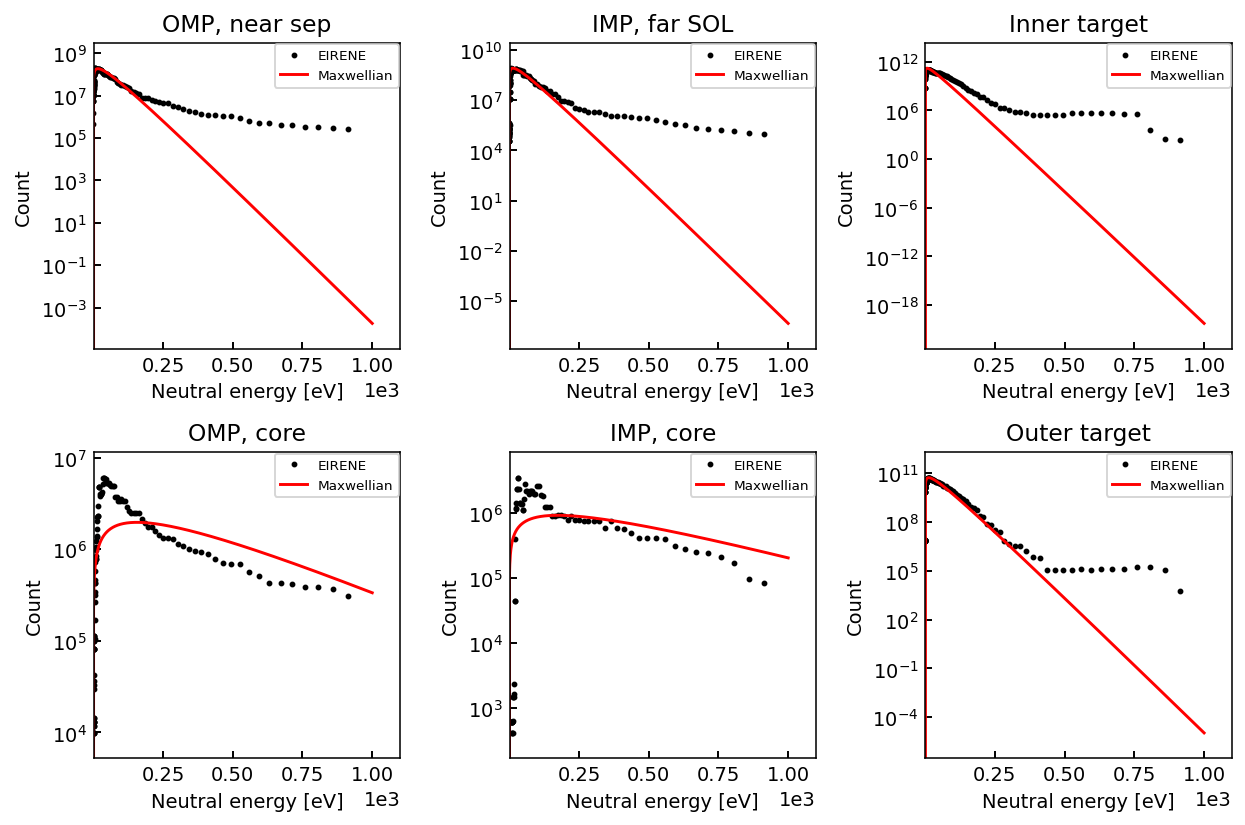

In [73]:
normalised = False


## Extract spectra from log files
base = Path(casepath)
logpaths = []
for dirpath, dirnames, filenames in os.walk(casepath):
    for fname in filenames:
        # fname is just the basename, e.g. "run.log.2030"
        if "run.log" in fname:
            logpaths.append(os.path.join(dirpath, fname))

spectra = {}
for logpath in logpaths:
    spectrum = extract_eirene_spectra(logpath)
    spectra[spectrum["cell_id"]] = spectrum
    
    
## Collect temperatures and densities from fort.46
fort46_path = os.path.join(casepath, "fort.46.pkl")
with open(fort46_path, "rb") as f:
    f46 = pickle.load(f)
    
temps = {}
densities = {}
for cell_id in spectra:
    temps[cell_id] = f46["tdena"][cell_id][0]
    densities[cell_id] = f46["pdena"][cell_id][0]
    
## Calculate cell volumes
volumes = {}
for name, cell_id in cell_ids.items():
    node_ids = triang.triangles[cell_id]
    R1, R2, R3 = nodes[node_ids, 0]
    Z1, Z2, Z3 = nodes[node_ids, 1]
    
    # Compute signed 2D area of triangle
    area = 0.5 * abs(R1*(Z2 - Z3) + R2*(Z3 - Z1) + R3*(Z1 - Z2))

    # Average radius
    R_avg = (R1 + R2 + R3) / 3

    # Volume of revolution
    volumes[cell_id] = 2 * np.pi * R_avg * area

    
## Compute Maxwellian distributions
def maxwellian(E,T):
    """
    E is kinetic energy of particle in eV
    T is temperature in eV
    """
    
    # return (2*np.sqrt(E))/(np.sqrt(np.pi * T**(3/2))) * np.exp(-E/T)
    return 2 * np.sqrt(E/np.pi) * (1/T)**(3/2) * np.exp(-E/T)
    # return 1/T * np.exp(-E/T)

energies = np.linspace(0,1e3,1000)

maxwellians = {}
for cell_id in spectra:
    temp = temps[cell_id]
    max = spectra[cell_id]["flux_per_bin"].max()
    
    
    maxwellians[cell_id] = np.array([maxwellian(E, temp)*max for E in energies])
    
## Plot
labels = {
    5918 : "OMP, near sep",
    2030 : "OMP, core",
    7322 : "IMP, far SOL",
    2138 : "IMP, core",
    5106 : "Outer target",
    5336 : "Inner target",
}

cell_ids = inv = {v: k for k, v in labels.items()}

colors = {
    "OMP, near sep" : "skyblue",
    "OMP, core" : "navy",
    "IMP, far SOL" : "lime",
    "IMP, core" : "forestgreen",
    "Outer target" : "black",
    "Inner target" : "red"
}



# location = "OMP, far SOL"
location = "Outer target"

def plot_spectrum(ax, location, xlog = False, ylog = False, normalised = False):
    """
    Plot the spectrum for a given location.
    """
    cell_id = cell_ids[location]
    ax.set_title(location)
    spectrum = spectra[cell_id]
    label = labels[cell_id]
    color = "black"
    kinetic = scipy.signal.medfilt(spectrum["flux_per_bin"] , kernel_size=7)
    kinetic_normalised = kinetic / kinetic.max()
    kinetic_intgral = scipy.integrate.trapezoid(kinetic, spectrum["B_mean"])
    
    # maxwellian = maxwellians[cell_id] / maxwellians[cell_id].max()
    maxwellian = maxwellians[cell_id]
    maxwellian_normalised = maxwellian / maxwellian.max()
    maxwellian_integral = scipy.integrate.trapezoid(maxwellian, energies)
    maxwellian *= kinetic_intgral / maxwellian_integral
    # maxwellian *= 
    
    # kinetic = kinetic / kinetic.max()

    if normalised:
        plot_kinetic = kinetic_normalised
        plot_maxwellian = maxwellian_normalised
    else:
        plot_kinetic = kinetic
        plot_maxwellian = maxwellian
        
    ax.plot(spectrum["B_mean"], plot_kinetic, label = "EIRENE", color = color, lw = 0, ms = 2, marker = "o")
    ax.plot(energies, plot_maxwellian, label = f"Maxwellian", color = "red", ls = "-", lw = 1.5)
        
    if xlog:
        ax.set_xscale("log")
    if ylog:
        ax.set_yscale("log")
    ax.set_xlabel("Neutral energy [eV]")
    ax.set_ylabel("Count")
    ax.set_xlim(1, None)
    # ax.set_ylim(1e4, 1e12)
    ax.legend(fontsize = "x-small")
    
# fig, ax = plt.subplots()
# plot_spectrum(ax, location)

fig, axes = plt.subplots(2,3, figsize = (9, 6))

normalised = False
xlog = False
ylog = True
    
plot_spectrum(axes[0,0], "OMP, near sep", xlog = xlog, ylog = ylog, normalised = normalised)
plot_spectrum(axes[1,0], "OMP, core", xlog = xlog, ylog = ylog, normalised = normalised)
plot_spectrum(axes[0,1], "IMP, far SOL", xlog = xlog, ylog = ylog, normalised = normalised)
plot_spectrum(axes[1,1], "IMP, core", xlog = xlog, ylog = ylog, normalised = normalised)
plot_spectrum(axes[0,2], "Inner target", xlog = xlog, ylog = ylog, normalised = normalised)
plot_spectrum(axes[1,2], "Outer target", xlog = xlog, ylog = ylog, normalised = normalised)

fig.tight_layout()
# fig.legend(bbox_to_anchor = (0.5, 0.9), loc = "lower center", ncols = 3, fontsize = "small")


In [60]:
f46.keys()

dict_keys(['ntri', 'pdena', 'pdenm', 'pdeni', 'pdenan', 'edena', 'edenm', 'edeni', 'tdena', 'tdenm', 'tdeni', 'pdenn', 'edenn', 'tdenn', 'vxdena', 'vxdenm', 'vxdeni', 'vydena', 'vydenm', 'vydeni', 'vzdena', 'vzdenm', 'vzdeni', '__comments__'])

In [61]:
# kinetic = scipy.signal.medfilt(spectrum["flux_per_bin"] , kernel_size=1)
spectrum = spectra[cell_ids[location]]
kinetic = spectrum["flux_per_bin"]
dens = scipy.integrate.trapezoid(spectrum["B_mean"], kinetic) / volumes[cell_ids[location]]
print(f"dens: {dens:.2e} m^-3")
dens

dens: -3.30e+17 m^-3


np.float64(-3.296780385821074e+17)

In [62]:
%matplotlib inline

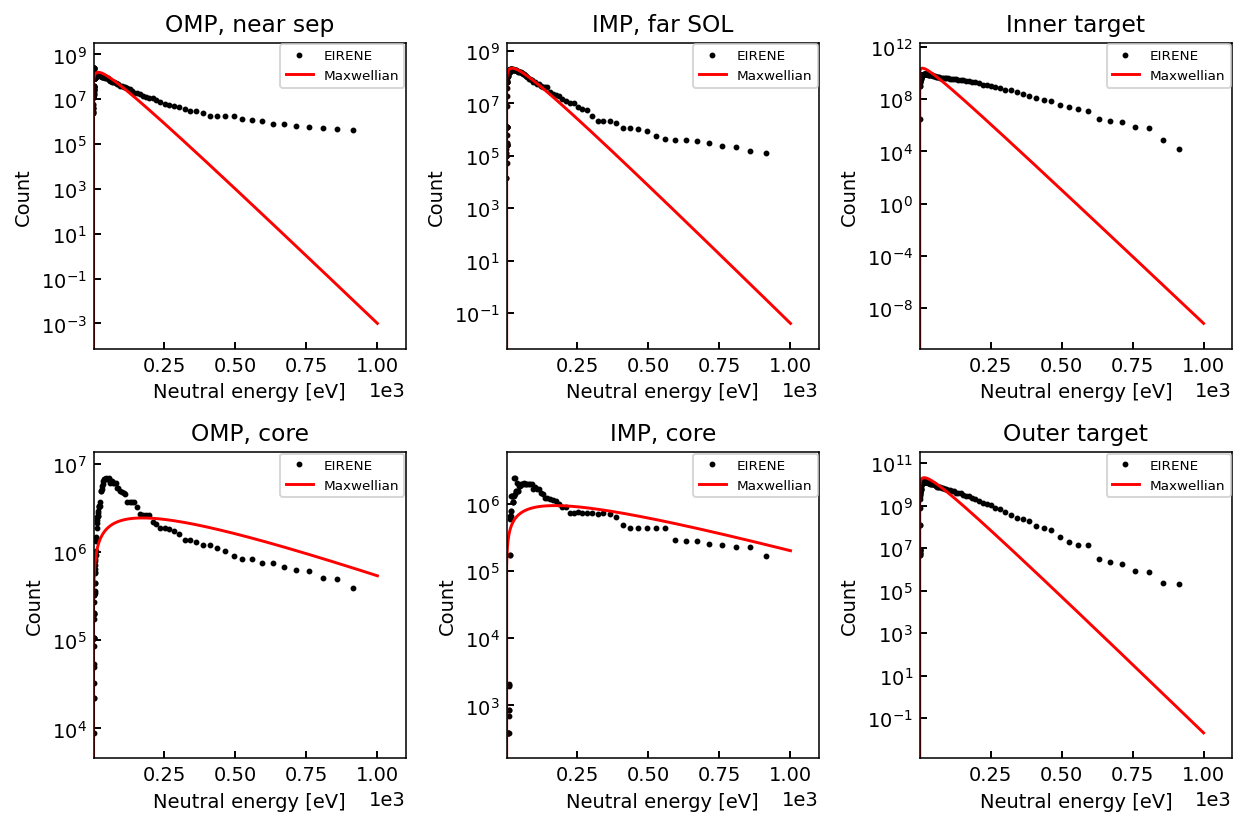

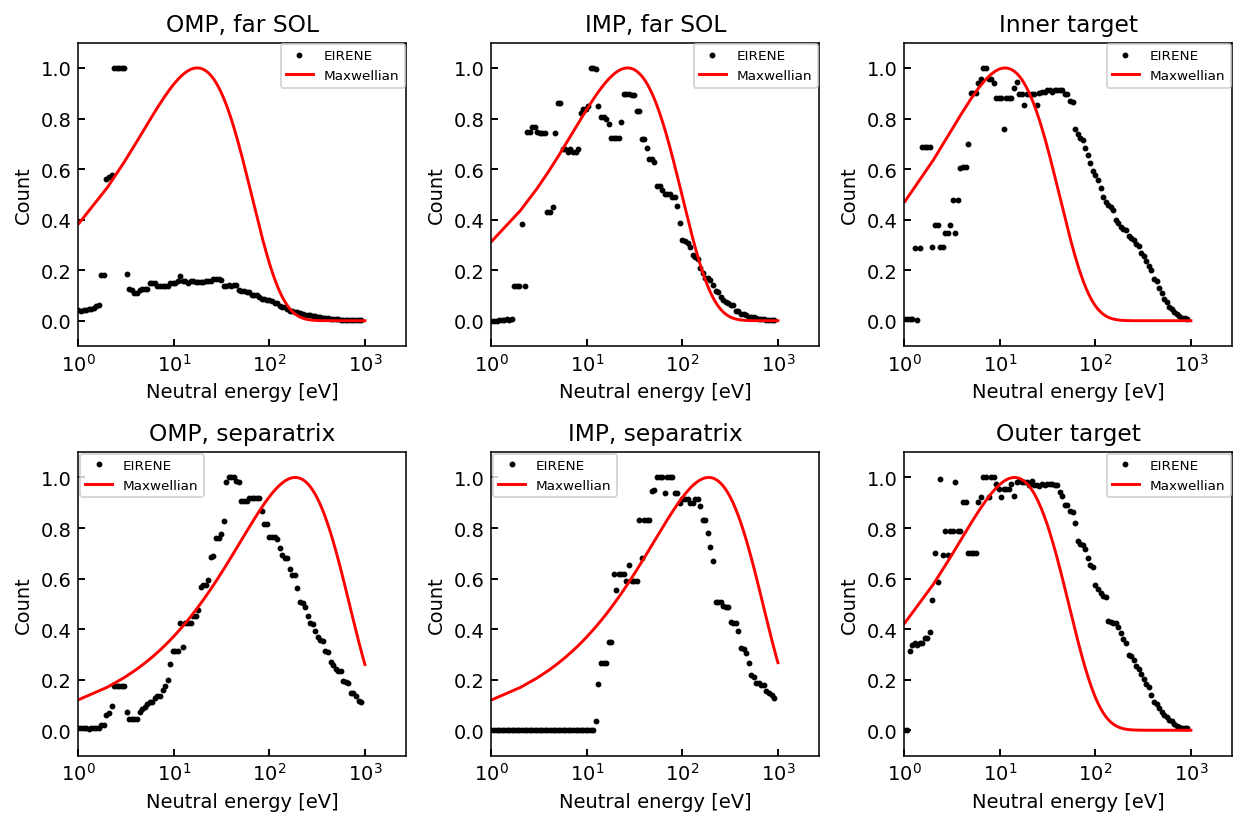

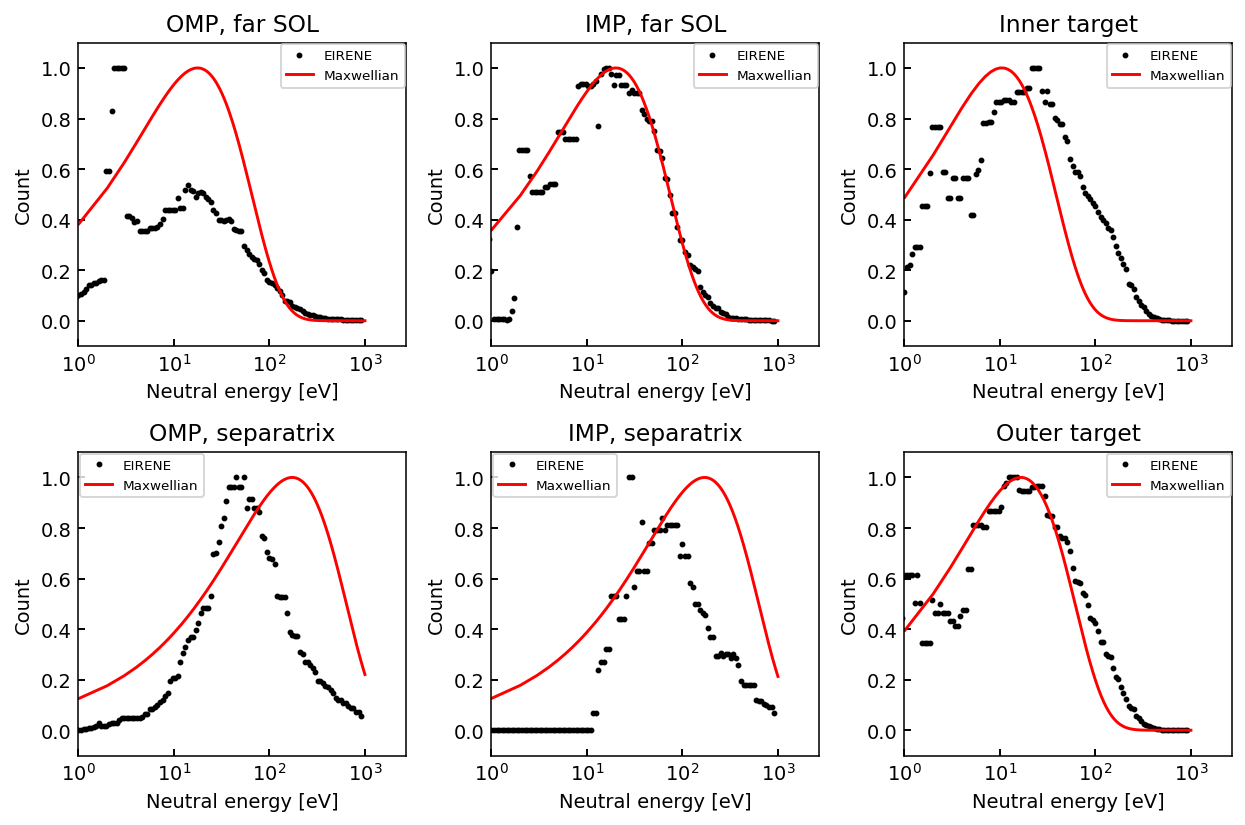

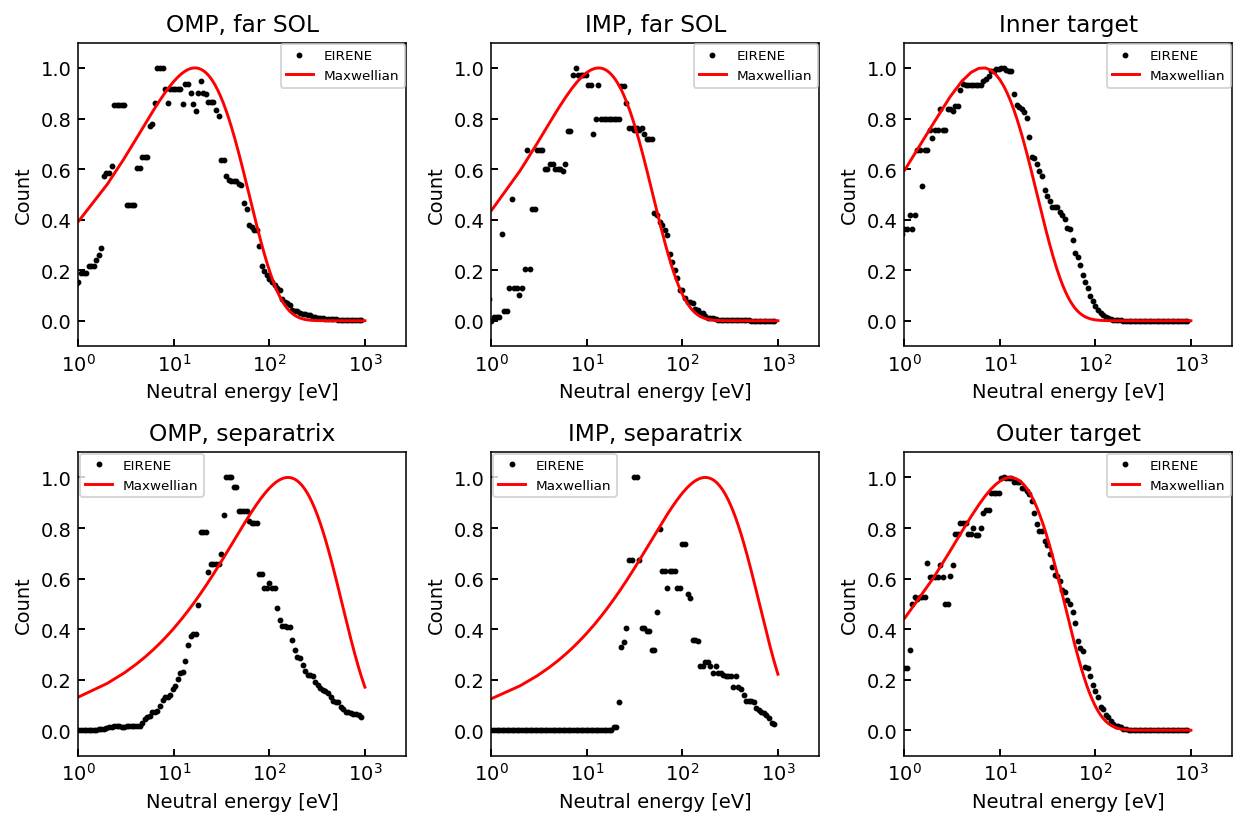

In [3]:
casepath = solpscases["tightwall_noD2_2e19_zerophi_spectra"]

for case in [
    "tightwall_noD2_1e19_zerophi_spectra",
    "tightwall_noD2_2e19_zerophi_spectra",
    "tightwall_noD2_3e19_zerophi_spectra",
]:
    
    casepath = solpscases[case]
    ## Extract spectra from log files
    base = Path(casepath)
    logpaths = []
    for dirpath, dirnames, filenames in os.walk(casepath):
        for fname in filenames:
            # fname is just the basename, e.g. "run.log.2030"
            if "run.log" in fname:
                logpaths.append(os.path.join(dirpath, fname))

    spectra = {}
    for logpath in logpaths:
        spectrum = extract_eirene_spectra(logpath)
        spectra[spectrum["cell_id"]] = spectrum
        
        
    ## Collect temperatures and densities from fort.46
    fort46_path = os.path.join(casepath, "fort.46.pkl")
    with open(fort46_path, "rb") as f:
        f46 = pickle.load(f)
        
    temps = {}
    densities = {}
    for cell_id in spectra:
        temps[cell_id] = f46["tdena"][cell_id][0]
        densities[cell_id] = f46["pdena"][cell_id][0]
        
    ## Compute Maxwellian distributions
    def maxwellian(E,T):
        """
        E is kinetic energy of particle in eV
        T is temperature in eV
        """
        
        # return (2*np.sqrt(E))/(np.sqrt(np.pi * T**(3/2))) * np.exp(-E/T)
        return 2 * np.sqrt(E/np.pi) * (1/T)**(3/2) * np.exp(-E/T)
        # return 1/T * np.exp(-E/T)

    energies = np.linspace(0,1e3,1000)

    maxwellians = {}
    for cell_id in spectra:
        temp = temps[cell_id]
        max = spectra[cell_id]["flux_per_bin"].max()
        
        
        maxwellians[cell_id] = np.array([maxwellian(E, temp)*max for E in energies])
        
    ## Plot
    labels = {
        5918 : "OMP, far SOL",
        2030 : "OMP, separatrix",
        7322 : "IMP, far SOL",
        2138 : "IMP, separatrix",
        5106 : "Outer target",
        5336 : "Inner target",
    }

    cell_ids = inv = {v: k for k, v in labels.items()}

    colors = {
        "OMP, far SOL" : "skyblue",
        "OMP, separatrix" : "navy",
        "IMP, far SOL" : "lime",
        "IMP, separatrix" : "forestgreen",
        "Outer target" : "black",
        "Inner target" : "red"
    }



    location = "OMP, far SOL"

    fig, axes = plt.subplots(2,3, figsize = (9, 6))

    def plot_spectrum(ax, location):
        """
        Plot the spectrum for a given location.
        """
        cell_id = cell_ids[location]
        ax.set_title(location)
        spectrum = spectra[cell_id]
        label = labels[cell_id]
        color = "black"
        maxwellian = maxwellians[cell_id] / maxwellians[cell_id].max()
        kinetic = scipy.signal.medfilt(spectrum["flux_per_bin"] , kernel_size=7)
        kinetic = kinetic / kinetic.max()

        ax.plot(spectrum["B_mean"], kinetic, label = "EIRENE", color = color, lw = 0, ms = 2, marker = "o")
        ax.plot(energies, maxwellian, label = f"Maxwellian", color = "red", ls = "-", lw = 1.5)
            
        ax.set_xscale("log")
        # ax.set_yscale("log")
        ax.set_xlabel("Neutral energy [eV]")
        ax.set_ylabel("Count")
        ax.set_xlim(1, None)
        # ax.set_ylim(1e4, 1e12)
        ax.legend(fontsize = "x-small")
        
    plot_spectrum(axes[0,0], "OMP, far SOL")
    plot_spectrum(axes[1,0], "OMP, separatrix")
    plot_spectrum(axes[0,1], "IMP, far SOL")
    plot_spectrum(axes[1,1], "IMP, separatrix")
    plot_spectrum(axes[0,2], "Inner target")
    plot_spectrum(axes[1,2], "Outer target")

    fig.tight_layout()
    # fig.legend(bbox_to_anchor = (0.5, 0.9), loc = "lower center", ncols = 3, fontsize = "small")

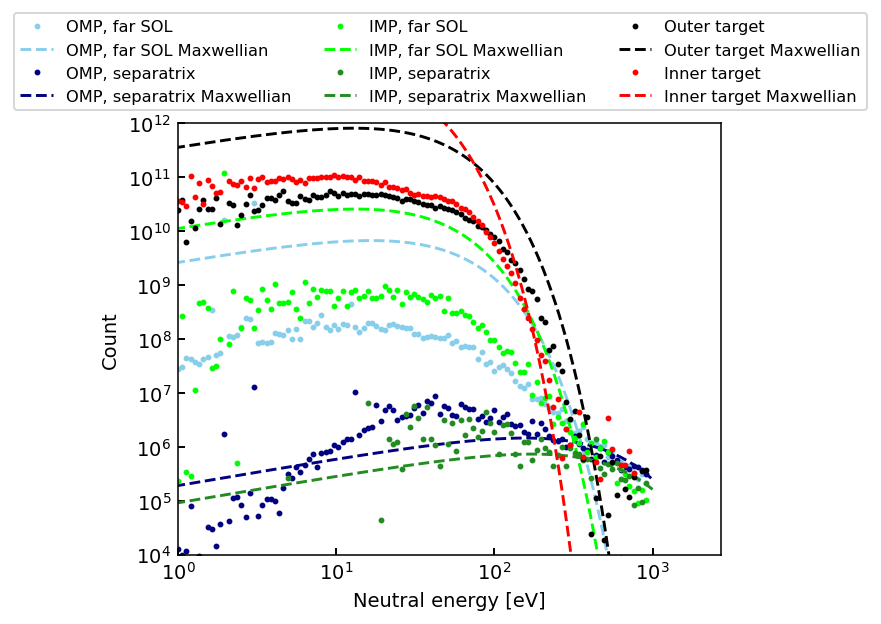

In [177]:
fig, ax = plt.subplots()

labels = {
    5918 : "OMP, far SOL",
    2030 : "OMP, separatrix",
    7322 : "IMP, far SOL",
    2138 : "IMP, separatrix",
    5106 : "Outer target",
    5336 : "Inner target",
}

colors = {
    "OMP, far SOL" : "skyblue",
    "OMP, separatrix" : "navy",
    "IMP, far SOL" : "lime",
    "IMP, separatrix" : "forestgreen",
    "Outer target" : "black",
    "Inner target" : "red"
}

for cell_id in labels.keys():
    spectrum = spectra[cell_id]
    label = labels[cell_id]
    color = colors[label]
    
    ax.plot(spectrum["B_mean"], spectrum["flux_per_bin"], label = label, color = color, lw = 0, ms = 2, marker = "o")
    
    ax.plot(energies, maxwellians[cell_id], label = f"{label} Maxwellian", color = color, ls = "--", lw = 1.5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Neutral energy [eV]")
ax.set_ylabel("Count")
ax.set_xlim(1, None)
ax.set_ylim(1e4, 1e12)
fig.legend(bbox_to_anchor = (0.5, 0.9), loc = "lower center", ncols = 3, fontsize = "small")

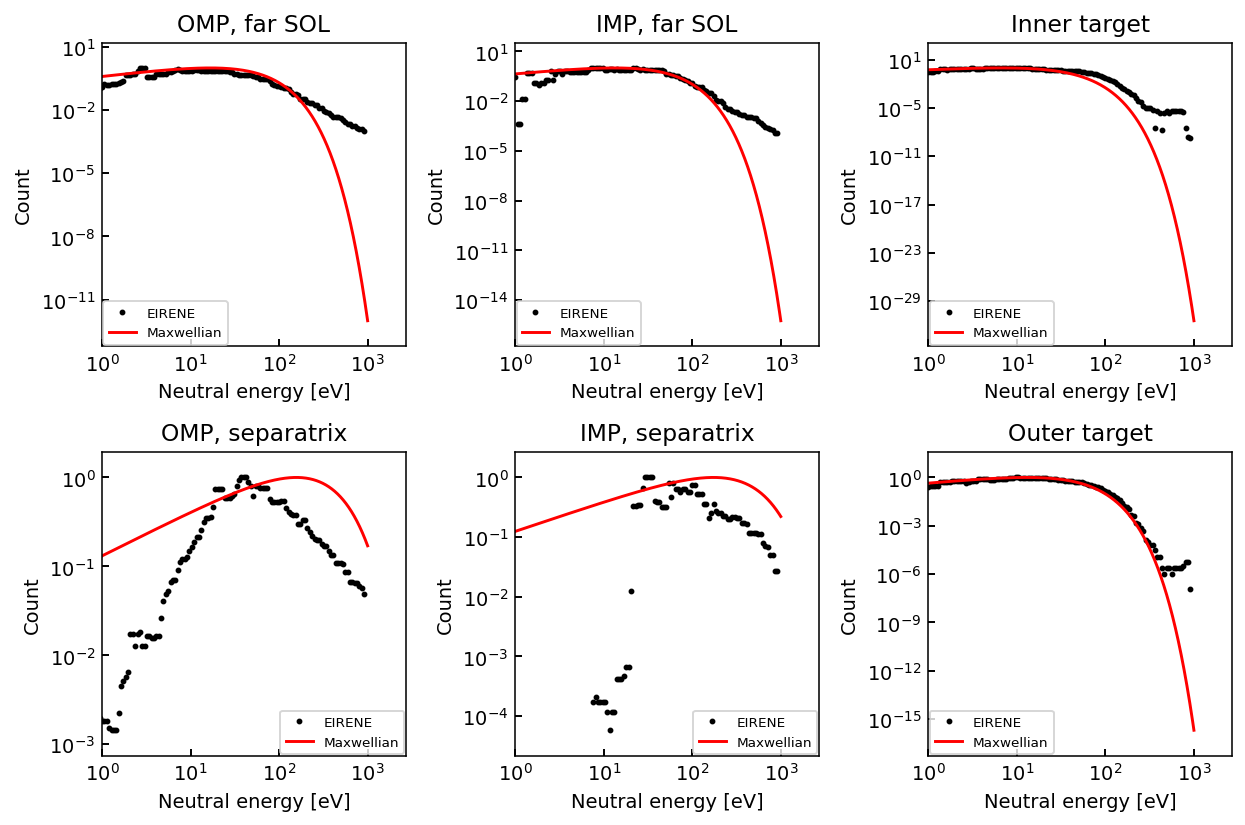